# Задача 1. Реализация методов СЛАУ для уравнения Пуассона


In [53]:
import numpy as np
from scipy.linalg import block_diag

In [54]:
n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1



In [55]:
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

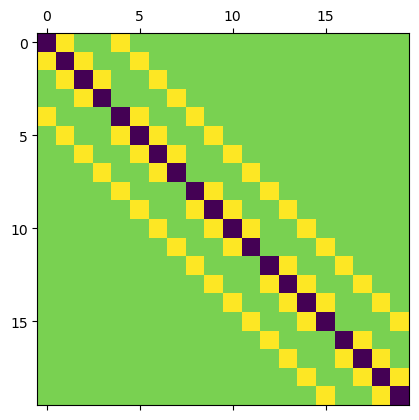

In [56]:
import matplotlib.pyplot as plt
plt.matshow(m)

In [57]:
b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1


Решение solve_banded: [0.00135333 0.00541331 0.0202999  0.0244355  0.04999745 0.07202881
 0.10766109 0.10602122 0.20259686 0.24439497 0.4583314  0.21063039
 0.17570337 0.13979521 0.10468686 0.06816022 0.03508866 0.02815879
 0.00750901 0.00187725]
Решение spsolve: [0.02602508 0.05134394 0.06553918 0.03890999 0.05275637 0.1138115
 0.17190279 0.09010077 0.07118891 0.1792429  0.4181597  0.14959031
 0.05275637 0.1138115  0.17190279 0.09010077 0.02602508 0.05134394
 0.06553918 0.03890999]
Решение Gauss-Seidel: [0.02602507 0.05134392 0.06553916 0.03890998 0.05275635 0.11381147
 0.17190276 0.09010076 0.07118889 0.17924287 0.41815967 0.14959029
 0.05275635 0.11381147 0.17190276 0.09010076 0.02602507 0.05134392
 0.06553916 0.03890998]


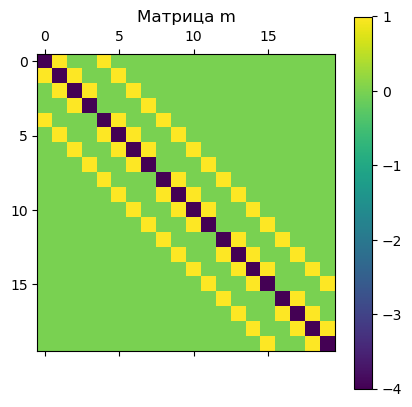

In [63]:
import numpy as np
from scipy.sparse import csc_matrix, diags, spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csc_array
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt
import numba

# Создание разреженной матрицы через scipy.sparse
matr1 = csc_array(m).toarray()

size = m.shape[0]
main_diag = -4 * np.ones(size)
side_diag = np.ones(size)
side_diag[np.arange(size) % (n - 1) == 0] = 0 
far_diag = np.ones(size - (n - 1))

# Создаем разреженную матрицу
diagonals = [main_diag, side_diag[:-1], side_diag[:-1], far_diag, far_diag]
offsets = [0, 1, -1, n - 1, -(n - 1)]

matr2 = diags(diagonals, offsets, format='csc')

diagonals = np.zeros((5, size))
diagonals[0, :] = main_diag                    
diagonals[1, :-1] = side_diag[:-1]               
diagonals[2, 1:] = side_diag[:-1]              
diagonals[3, :-(n - 1)] = far_diag            
diagonals[4, (n - 1):] = far_diag               

offsets = [0, 1, -1, n - 1, -(n - 1)]

matr3 = spdiags(diagonals, offsets, size, size, format='csc')

# Создание матрицы для solve_banded
main_diag = -4 * np.ones(size)  
side_diag = np.ones(size - 1)  
far_diag = np.ones(size - (n - 1))  

side_diag[np.arange(1, size) % (n - 1) == 0] = 0


ab = np.zeros((5, size))  
ab[2] = main_diag 
ab[1, 1:] = side_diag 
ab[3, :-1] = side_diag
ab[0, n - 1:] = far_diag  
ab[4, :-(n - 1)] = far_diag  

# Решение системы
x_banded = solve_banded((2, 2), ab, b)


# Решение с использованием spsolve
x_spsolve = spsolve(csc_array(m), b)

# Метод Зейделя с Numba
@numba.njit(parallel=True)
def gauss_seidel_numba(A, b, x0, tol=1e-8, max_iter=1000):
    n = A.shape[0]
    x = x0.copy()

    for _ in range(max_iter):
        x_new = x.copy()
        for i in numba.prange(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1:], x[i + 1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]

        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            break
        x = x_new

    return x

# Решение методом Зейделя
x0 = np.zeros_like(b)
x_gauss_seidel = gauss_seidel_numba(matr1, b, x0)

# Вывод результатов
print("Решение solve_banded:", x_banded)
print("Решение spsolve:", x_spsolve)
print("Решение Gauss-Seidel:", x_gauss_seidel)

# Построение графика
plt.matshow(matr1)
plt.title("Матрица m")
plt.colorbar()
plt.show()


# Задача 2. Метод Шульца (минимальных невязок) для вычисления обратной матрицы

In [1]:
import numpy as np

A = np.array([[1,2,3],
              [-1,2,2],
              [0,3,-2]])

print("Обратная матрица (через np.linalg.inv(A)): \n", np.linalg.inv(A))

X_k = np.array([[0.5, -0.5, 0],
                [0, 0, 0.2],
                [0.1, 0.1, -0.1]])

m = 5
n = 3
eps = 1e-6

if np.linalg.norm(np.eye(n) - A @ X_k) > 1:
  print('Норма больше единицы')
else:
  while np.linalg.norm(np.eye(n) - A @ X_k) > eps:
    psi = np.eye(n) - A @ X_k
    sum = np.zeros((n,n))
    for i in range(m+1):
      sum += np.linalg.matrix_power(psi, i)
    X_k = X_k @ sum

print("Обратная матрица (через итерации): \n", X_k)

Обратная матрица (через np.linalg.inv(A)): 
 [[ 0.43478261 -0.56521739  0.08695652]
 [ 0.08695652  0.08695652  0.2173913 ]
 [ 0.13043478  0.13043478 -0.17391304]]
Обратная матрица (через итерации): 
 [[ 0.43478261 -0.56521739  0.08695652]
 [ 0.08695652  0.08695652  0.2173913 ]
 [ 0.13043478  0.13043478 -0.17391304]]


# Задача 3. Метод вращений Гивенса и QR-разложение.

После первой стадии метода вращений Гивенса система имеет вид

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(1)} x_2+a_{23}^{(1)} x_3+\ldots+a_{2 n}^{(1)} x_n=b_2^{(1)} \text {, }\\
\ldots\\
&a_{n 2}^{(1)} x_2+a_{n 3}^{(1)} x_3+\ldots+a_{n n}^{(1)} x_n=b_n^{(1)} .
\end{aligned}

Доказать следующие формулы:
$$
\begin{aligned}
&a_{1 j}^{(l-1)}=c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \quad a_{l j}^{(1)}=-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},\\
&\begin{aligned}
& j=1,2, \ldots, n, \\
b_1^{(l-1)}=c_{1 l} b_1^{(l-2)}+s_{1 l} b_l, \quad \quad b_l^{(1)}=&-s_{1 l} b_1^{(l-2)}+c_{1 l} b_l, \\
l=2,3, \ldots, n,
\end{aligned}\\
&c_{1 l}=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}}, \quad s_{1 l}=\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}},
\\
& l=2,3, \ldots, n,\\
\end{aligned}
$$

__Решение__:

В данном методе мы умножаем на матрицу поворота с нетривиальными коэффициентами только $s_{1l}$ и $c_{1l}$ (соответственно не на диагонали и на диагонали). Первые 2 строчки беруться из умножения матриц.

По условию мы хотим занулить элемент $a_{l,1}$ на шаге $l$, где нумерация начинается с $l = 2$. \\
На этом шаге выбираются 2 неотрицательных числа $s_{1l}, c_{1l}$. Обозначим первую строку $a_1^{(l-2)}$, а вторую $a_l$. Заменим первую строку на строку $c_{1l}a_1^{(l-2)} + s_{1l}a_l$, а вторую на строку $-s_{1l}a_1^{(l-2)} + c_{1l}a_l$.

На числа $c_{1l}$ и $s_{1l}$ накладываются условия:

* $-s_{1l}a_{11}^{(l-2)} + c_{1l}a_{l1} = 0$
* $s_{1l}^2 + c_{1l}^2 = 1$

Откуда $c_1 = \frac{a_{11}^{(l-2)}}{\sqrt{(a_{11}^{(l-2)})^2 + a_{l1}^2}}$ и $s_1  = \frac{a_{l1}}{\sqrt{(a_{11}^{(l-2)})^2 + a_{l1}^2}}$

После второй стадии метода вращения Гивенса система уравнений имеет вид:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
&a_{33}^{(2)} x_3+\ldots+a_{3 n}^{(2)} x_n=b_3^{(2)} \text {, }\\
\ldots \\
&a_{n 3}^{(2)} x_3+\ldots+a_{n n}^{(2)} x_n=b_n^{(2)}
\end{aligned}  

Доказать следующие формулы
$$
\begin{aligned}
&a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \text {, }\\
&j=2,3, \ldots, n\\
&\begin{aligned}
b_2^{(l-1)}=c_{2 l} b_2^{(l-2)}+s_{2 l} b_l^{(1)}, \quad \quad b_l^{(2)}=&-s_{2 l} b_2^{(l-2)}+c_{2 l} b_l^{(1)}, \\
& l=3,4, \ldots, n,
\end{aligned}\\
&c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}
\end{aligned}  
$$

__Решение__:

Аналогично предыдущему шагу получаем все нужные формулы (заменяем строчку 1 на строчку 2 и считаем, что в строке 1 стоят уже новые значения из предыдущего шага)

После (n-1) шагов метода Гивенса получаем систему:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)},\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
\ldots \\
&a_{n n}^{(n-1)} x_n=b_n^{(n-1)} \text {, }
\end{aligned}  




Где

\begin{aligned}
&a_{k j}^{(l-1)}=c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \quad a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}\\
&j=k, k+1, \ldots, n,\\
&b_k^{(l-1)}=c_{k l} b_k^{(l-2)}+s_{k l} b_l^{(k-1)}, \quad b_l^{(k)}=-s_{k l} b_k^{(l-2)}+c_{k l} b_l^{(k-1)} \text {, }\\
&k=1, \ldots, n, \quad l=k+1, \ldots, n
\end{aligned}

а  
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}
$$

__Решение__:

Аналогично предыдущему шагу получаем все нужные формулы (заменяем строчку 1 на строчку $k$ и считаем, что в строке 1 стоят уже новые значения из предыдущего шага)

Доказать, что метод Гивенса реализует QR-разложение матрицы.



$$
A=Q R,
$$
где $Q$ - ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

__Решение__:

Каждая из матриц, на которую мы унможаем систему, является матрицей поворота, поэтому она ортогональна. Если принемить это преобразование несколько раз, то композиция также будет выражаться ортогональной матрицей (т.к. произведение оргогональных матриц ортогонально).

По условию в конце этих преобразований должна получится верхнетреугольная матрица, поэтому исходная матрица $A$ может быть записана в виде $QR$, где $Q$ - орготональная матрица (суммарный поворот), а $R$ - вернхнетреугольная.

Согласно формулам

$$a_{k k}^{(l-1)}=c_{k l} a_{k k}^{(l-2)}+s_{k l} a_{l k}^{(k-1)}, \quad a_{l j}^{(k)}=-s_{k l} a_{k k}^{(l-2)}+c_{k l} a_{l k}^{(k-1)}$$

$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}
$$

Поэтому видно, что $a_{k k}^{(l-1)} \propto (a_{k k}^{(l-2)})^2 + (a_{l k}^{(k-1)})^2 > 0$, и все числа на главной диагонали положительны.

#Задача 4. Асимпотика метода Гивенса.

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^3 / 3
$$
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  

# Задача 4. Асимпотика метода Гивенса

Если на текущем шаге мы рассматриваем столбец $k$, то над каждой итерации необходимо умножать 2 строки длины $(n-k)$ на коэффициенты $c_{kl}$ и $s_{kl}$, всего получается $4(n-k)$ действий. Таких действий нужно сделать также $n-k$, то есть получаем $4(n-k)^2$. Суммируя по $k$ от 1 до $n$ получаем, что метод требует $\approx 4n^3/3$ действий умножения.

Метод Гаусса требует умножить каждую строчку на число на каждом шаге. Если рассматривается стробец $k$, то получается $n-k$ умножений. Дальше аналогично получаем $\approx n^3/3$ действий умножения.

# Задача 5. SVD для разреженных матриц и МНК.

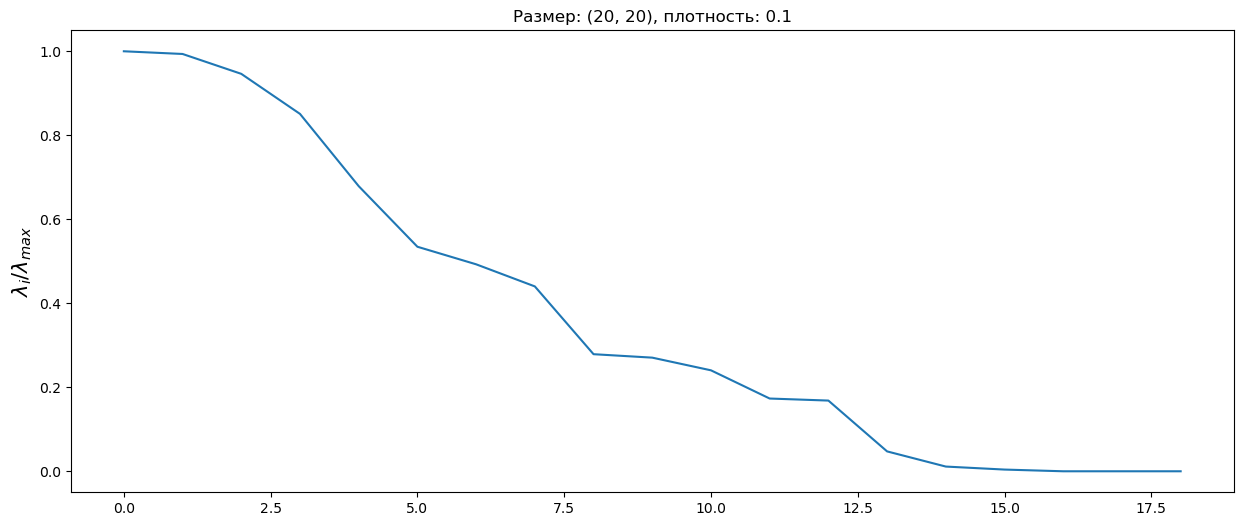

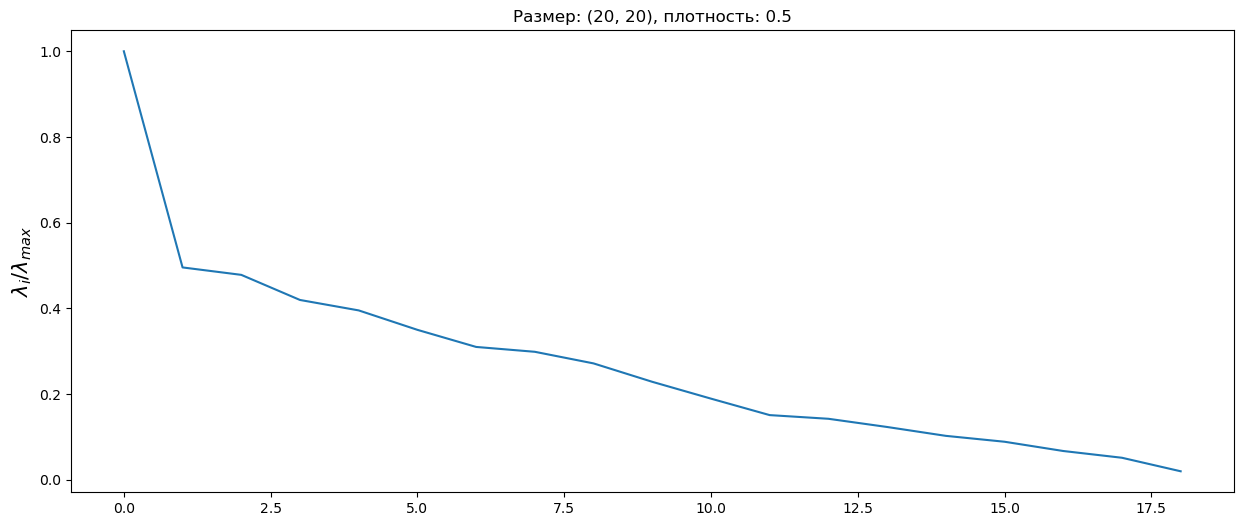

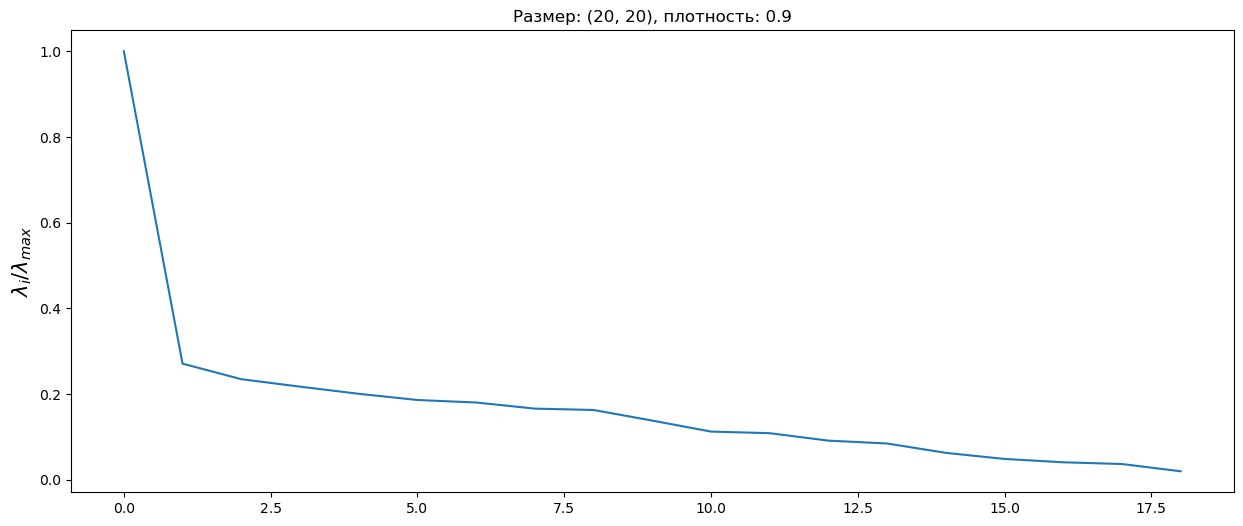

In [64]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np

def singular_values_attenuation_in_sparse(shape:tuple, density:float):
    '''
    Исследует убывание сингулярных чисел в разреженных матрицах
    размера shape и с плотностью density (от 0 до 1)
    '''
    sing_values_sum = np.zeros(min(shape)- 1 )

    sample_size = 100

    for _ in range(sample_size):
        sparse = sp.sparse.rand(shape[0], shape[1],
                           density=density,
                           random_state=42)
        sing_values_sum += sp.sparse.linalg.svds(sparse, k=min(shape)-1,
                                        return_singular_vectors=False)
    plt.figure(figsize=(15, 6))
    plt.title(f'Размер: {shape}, плотность: {density}')
    plt.ylabel(r'$\lambda_i / \lambda_{max}$', fontsize=15)

    mean_vals = sing_values_sum[::-1] / sample_size

    plt.plot(mean_vals / mean_vals[0])

size = 20
singular_values_attenuation_in_sparse((size, size), 0.1)
singular_values_attenuation_in_sparse((size, size), 0.5)
singular_values_attenuation_in_sparse((size, size), 0.9)

Пусть $A=U \Sigma V^*$ SVD для матрицы $A$. Тогда псевдообратная матрица равна:
$$
A^{\dagger}=V \Sigma^{\dagger} U^*
$$

где $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел матрицы $A$. Действительно,
$$
\begin{gathered}
A^{\dagger}=\lim _{\alpha \rightarrow 0}\left(\alpha I+A^* A\right)^{-1} A^*=\lim _{\alpha \rightarrow 0}\left(\alpha V V^*+V \Sigma^2 V^*\right)^{-1} V \Sigma U^*=\lim _{\alpha \rightarrow 0}\left(V\left(\alpha I+\Sigma^2\right) V^*\right)^{-1} V \Sigma U^* \\
=V \lim _{\alpha \rightarrow 0}\left(\alpha I+\Sigma^2\right)^{-1} \Sigma U^*=V \Sigma^{\dagger} U^*
\end{gathered}
$$

- Вы можете проверить, что $\Sigma^{\dagger}$ состоит из обращённых ненулевых сингулярных чисел
- Если сингулярные числа малы, их можно не обращать, а просто приравнять к нулю. Это даст решение, менее чувствительное к шуму в правой части.

Псевдообратная матрица решает задачу минимизации методом наименьших квадратов. Однако она не является самым оптимальным способом решить эту задачу. Более эффективно использовать QR-разложение. Если $A$ имеет полный ранг, то

$$
x=A^{\dagger} b=\left(A^* A\right)^{-1} A^* b=\left((Q R)^*(Q R)\right)^{-1}(Q R)^* b=\left(R^* Q^* Q R\right)^{-1} R^* Q^* b=R^{-1} Q^* b .
$$


Таким образом, необходимо решить следующую квадратную систему: $R x=Q^* b$
- $\quad R$ верхнетреугольная
- Решение требует $\mathcal{O}\left(n^2\right)$ операций
- Более устойчивый способ, чем использование псевдообратной матрицы напрямую.


Выполните следующие задания:

- Напишите программу, которая вычисляет псевдообратную матрицу с помощью SVD. Исследуйте, что происходит с числом обусловленности.

- Напишите решение задачи МНК с помощью вычисления псевдобратной матрицы через SVD

- Реализуйте QR-разложением и сравните с работой алгоритма из предыдущего пункта на случайных матрицах. Отдельно проведите сравнение на разреженных матрицах и плотных, выбирая разное значение density.







In [65]:
n = 10
m = 8
a = np.random.random(size=(n,m))
b = np.random.random(n)

def p_inv(a):
  u, s, vh = np.linalg.svd(a)
  s = s**(-1)
  s[s > 10*s[0]] = 0
  sig = np.concatenate([np.eye(s.size), np.zeros((n-m, m))],axis=0)
  sig[sig > 0] = s
  a_pinv = vh.T @ sig.T @ u.T
  return a_pinv

def mnk_svd(a, b):
  return p_inv(a) @ b

def mnk_qr(a, b):
  Q, R = np.linalg.qr(a)
  return np.linalg.inv(R) @ Q.T @ b

In [66]:
%%timeit
mnk_svd(a, b) #плотные матрицы

81.3 µs ± 14.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [67]:
%%timeit
mnk_qr(a, b) #плотные матрицы

119 µs ± 15.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [68]:
n = 10
m = 8
density = 0.1

a = sp.sparse.rand(n, m, density=density)
b = np.random.random(n)

def p_inv_sparse(a):
  u, s, vh = sp.sparse.linalg.svds(a)
  s = s**(-1)
  s[s > 10*s[0]] = 0
  sig = np.eye(s.size)
  sig[sig > 0] = s
  a_pinv = vh.T @ sig.T @ u.T
  return a_pinv

def mnk_svd_sparce(a, b):
  return p_inv_sparse(a) @ b

def mnk_qr_sparce(a, b):
  Q, R = np.linalg.qr(a.toarray())
  return np.linalg.inv(R) @ Q.T @ b

In [69]:
%%timeit
mnk_svd_sparce(a, b) #разреженные матрицы

756 µs ± 28.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
